# Script para definição do número de clusters (Algoritmo KMeans) - bases de dados do ENEM

**Autor**: Rafael Victor Araujo Bernardes - rafaelvictor.bernardes@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [2]:
# Variáveis de controle

# ano = '2019'
# ano = '2020'
# ano = '2021'
ano = '2022'
# ano = '2023'

DATASET_ENEM_PATH = 'D:\BASES_PRE_PROCESSADAS\PRE_PROCESSADOS_ENEM_' + ano + '.csv'
ELBOW_METHOD_RESULT_PATH = 'D:\GRAFICOS_ELBOW_METHOD\Elbow_Method_' + ano + '.png'

In [3]:
microdadosEnem = pd.read_csv(DATASET_ENEM_PATH, sep=',', encoding='ISO-8859-1')

In [4]:
microdadosEnem.shape

(2344823, 169)

In [5]:
microdadosEnem.head()

,MEDIA_NOTAS,TP_FAIXA_ETARIA_1,TP_FAIXA_ETARIA_2,TP_FAIXA_ETARIA_3,TP_FAIXA_ETARIA_4,TP_FAIXA_ETARIA_5,TP_FAIXA_ETARIA_6,TP_FAIXA_ETARIA_7,TP_FAIXA_ETARIA_8,TP_FAIXA_ETARIA_9,...,Q024_D,Q024_E,Q025_A,Q025_B,MACRO_REGIAO_CENTRO_OESTE,MACRO_REGIAO_NORDESTE,MACRO_REGIAO_NORTE,MACRO_REGIAO_SUDESTE,MACRO_REGIAO_SUL,K_Cluster
0,558.24,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,3
1,394.62,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,4
2,414.10,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,4
3,438.10,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,3
4,576.70,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,0


### Identificando o melhor número possivel de K`s

Utilizando o método do cotovelo (Elbow Method) para determinar o valor de K 

In [6]:
aux_init = "k-means++"
aux_n_init = "auto"
aux_max_iter = 10
aux_random_state = 72769

In [7]:
valores_k = []
inercias = []

colunas_para_kmeans = [col for col in microdadosEnem.columns if col not in ['MEDIA_NOTAS', 'K_Cluster']]

# Percorrendo diferentes valores de k para k entre 1 e 10
for k in range(1, 10):
    kmeans = KMeans(
        init         = aux_init,
        n_clusters   = k,
        n_init       = aux_n_init,
        max_iter     = aux_max_iter,
        random_state = aux_random_state
    ).fit(microdadosEnem[colunas_para_kmeans])

    valores_k.append(k)
    inercias.append(kmeans.inertia_)
    print(f'{k:d}) {kmeans.inertia_}')

1) 38793949.08269635
2) 34940127.648929015
3) 33700952.24380483
4) 32780734.91463276
5) 31968424.7617884
6) 31614387.914450865
7) 31319922.80982183
8) 31105918.34885064
9) 30894134.65247944


#### Sobre a Inertia

No contexto da clusterização utilizando o algoritmo KMeans do scikit-learn, o valor de "Inertia" é uma medida de quão bem os pontos de dados foram agrupados em clusters. Mais especificamente, a inércia é a soma das distâncias quadradas entre cada ponto de dados e o centroide do cluster ao qual ele pertence. É uma medida da coesão dos clusters, ou seja, quão próximos os pontos de dados estão uns dos outros dentro de cada cluster.

A inércia é um valor que o KMeans tenta minimizar durante o processo de ajuste do modelo. Um valor menor de inércia indica que os pontos de dados estão mais próximos dos seus centroides, sugerindo clusters mais coesos. No entanto, a inércia pode diminuir com o aumento do número de clusters, mesmo que os clusters se tornem menos significativos. Portanto, a escolha do número ideal de clusters geralmente envolve o uso de outras técnicas, como o método do cotovelo ("elbow method").

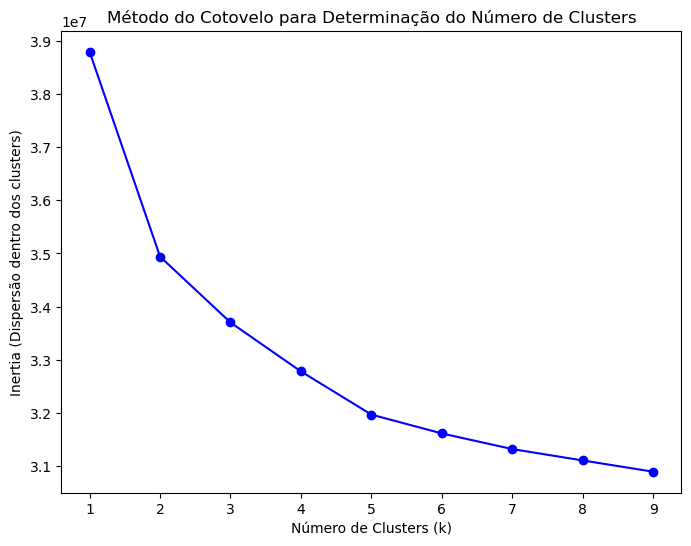

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste o tamanho do gráfico se necessário

# Definindo o título e os rótulos dos eixos
ax.set_title('Método do Cotovelo para Determinação do Número de Clusters')
ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Inertia (Dispersão dentro dos clusters)')

# Plotando os pontos e a linha
ax.plot(valores_k, inercias, marker='o', linestyle='-', color='blue')

plt.savefig(ELBOW_METHOD_RESULT_PATH, facecolor='w')

plt.show()